<a href="https://colab.research.google.com/github/NairaGama/Stroke-prediction-/blob/main/Projeto_Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Previsão de AVC**


##**Informações Gerais**
| Link da base | https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data|
|:------|:-----|
|Nome da base| “Stroke Prediction Dataset”|
|Origem| Kaggle.com|




##**Descrição do Problema**

De acordo com a Organização Mundial da Saúde (OMS), o AVC é a 2ª principal causa de morte no mundo, responsável por aproximadamente 11% do total de mortes. Este conjunto de dados é usado para prever se um paciente tem probabilidade de sofrer acidente vascular cerebral com base em parâmetros de entrada como sexo, idade, várias doenças e tabagismo. Cada linha dos dados fornece informações relevantes sobre o paciente.

##**Objetivo**

O objetivo deste trabalho é aplicar modelo de Regressão Logística e Random Forest para prever a probabilidade de ocorrência de Acidente Vascular Cerebral (AVC). Como base para o estudo, serão usadas as variáveis clínicas, verificando o desempenho do modelo utilizado e interpretando quais são os fatores associados ao risco de AVC.

##**Hipóteses**

1. Variáveis internas, como gênero, idade, hipertensão, doenças cardíacas, média de glicose e o IMC estão ligadas ao Acidente Vascular Cerebral.

2. Fatores externos, como o estado civil, o tipo de trabalho, tipo de residência, e o tabagismo podem ter relação com AVC.






##**Catálogo de dados**

**Versão:** 1.0

**Autores:** Naira Gama e Nadiellen Santos

**Data:** 13/10/2025

**Fonte dos dados:** Kaggle - Stroke Prediction Dataset



|Campo | Tipo | Descrição|
|:------|:-----|:---------|
|id| int| Identificador único do paciente|
|gender| string| Gênero|
|age| float| Idade|
|hypertension| int| 0 = não tem hipertensão, 1 = tem hipertensão|
|heart_disease| int| 0 = não tem doença cardíaca, 1 = tem doença cardíaca|
|ever_married| string| Estado civil|
|work_type| string| Tipo de trabalho|
|Residence_type| string| Tipo de residência|
|avg_glucose_level| float| Média de glicose do paciente|
|bmi| float| Índice de Massa Corpórea (IMC)|
|smoking_status| string| Status do tabagismo|
|stroke| int| 0 = não teve AVC, 1 = teve AVC|


##**Divisão de tarefas com o KDD**

**Equipe:**
1. **Entendimento** do domínio
2. **Seleção** do conjunto de dados

**Naira:**

1.   **Limpeza** do conjunto
2.   **Conciliar** o objetivo do processo KDD com a tarefa de MD
3.   **Minerar os Dados** procurando padrões de interesse nos modelos gerados
4.   **Agir** utilizando o conhecimento descoberto



**Nadiellen:**

1.   **Redução** da dimensionalidade dos dados
2.   **Escolher** o(s) algoritmo(s) a ser(em) utilizados
3.   **Interpretar** os padrões minerados, por meio de técnicas de visualização




- Work Type: Cada valor foi transformado em uma coluna. Quando um paciente apresentadeterminado valor a respectiva coluna é preenchida com 1 e as outras com 0. Como são 5 valores, a base tem 5 colunas a mais e a coluna original
work type é excluída.

- Other da coluna gênero: analisar se irá ser eliminada

#**Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub


from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score

#**Carregamento dos Dados**

Realização do carregamento automático do dataset diretamente do Kaggle, sem necessidade de download manual.

In [ ]:
#Caregando automaticamente o dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/stroke-prediction-dataset",
   'healthcare-dataset-stroke-data.csv'tro
)

print("First 5 records:", df.head())

/tmp/ipython-input-3180292814.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'stroke-prediction-dataset' dataset.
First 5 records:       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1      

#**Renomeação das colunas**

Nesta etapa acontece a renomeação das colunas. Essa tarefa tem o objetivo de facilitar a leitura, deixar a apresentação mais compreensível para quem não fala inglês, e levar uma padronização com os documetontos do projeto, que estarão em língua portuguesa.

In [ ]:
#renomeando colunas
df.columns = ['id', 'genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'casado', 'tipo_trabalho', 'tipo_residencia', 'media_glicose', 'IMC', 'status_fumante', 'AVC']
df

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#**Verificação dos Dados (pré-análise)**

Etapa para verificação e entendimento da estrutura dos dados.

Neste processo encontra-se:


1.   Volume dos dados
2.   Verificação de dados ausentes


In [ ]:
#verificando volume
df.shape

(5110, 12)

In [ ]:
#verificando dados ausentes
df.isnull().sum()

,0
id,0
genero,0
idade,0
hipertensao,0
doenca_cardiaca,0
casado,0
tipo_trabalho,0
tipo_residencia,0
media_glicose,0
IMC,201


**Conclusão da verificação:** o dataset está estruturado da seguinte forma:

1.   Volume:
     *  5.110 registros
     *  12 variávies (colunas)

2.   Dados ausentes:
     * Coluna "IMC" com 201 valores ausentes (NaN)



#**Análise Exploratória dos Dados (EDA)**

Esta etapa tem como principal objetivo entender os dados, seus padrões e possíveis problemas. A partir desta etapa, será possível realizar treinamnetos e conclusões finais.

Nesta seção encontra-se:

*   Classificação de variáveis por escala (nominal/ordinal/intervalar/racional; discreta/contínua)
*   Estrutura geral do DataFrame
*   Tipos de dados por coluna
*   Contagem de valores únicos
*   Estatísticas descritivas
*   Estatística para variáveis categóricas
*   Percentual de valores nulos
*   Total de registros duplicados
*   Resumo geral por tipo de dado
*   Verificação de colunas chaves
*   Frequência de registros
*   Visualizações exploratórias
*   Insights e hipóteses
*   Riscos e limitações




####**Classificação das variáveis por escala**

|Campo | Escala| Variável|
|:-----|:------|:--------|
|id|Nominal|Discreta|
|genero|Nominal|Discreta|
|idade|intervalar|Discreta|
|hipertensão|Nominal|Discreta|
|doença_cardiaca|Nominal| Discreta|
|casado|Nominal|Discreta|
|tipo_trabalho|Nominal|Discreta|
|tipo_residencia|Nominal|Discreta|
|media_glicose|Racional|Contínua|
|IMC|Racional|Contínua|
|status_fumante|Nominal|Discreta|
|AVC|Nominal|Discreta|

####**Estrutura Geral do DataFrame**

In [ ]:
df

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


####**Estatísticas**

Nesta subseção, encontra-se as estatísticas, tanto a descritiva para as variáveis numéricas do dataframe, quanto as para variáveis categóricas.

In [ ]:
#Estatísticas descritivas (variáveis numéricas)
df.describe()

,id,idade,hipertensao,doenca_cardiaca,media_glicose,IMC,AVC
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Estatísticas para variáveis categóricas"
df.describe(include ='object')

,genero,casado,tipo_trabalho,tipo_residencia,status_fumante
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


######**Analisando as colunas numéricas (float)**

Para um estudo mais aprofundado, também foi realizada uma análise somente das colunas numéricas.

In [ ]:
#analisando as colunas numericas
df_float = df[['idade', 'media_glicose', 'IMC']]
df_float.describe()

,idade,media_glicose,IMC
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


####**Tipos de Dados**

Foram encontrados três tipos de dados no dataframe, foram eles:


*   int
*   object
*   float



In [ ]:
print("Tipos de Dados")
df.dtypes

Tipos de Dados


,0
id,int64
genero,object
idade,float64
hipertensao,int64
doenca_cardiaca,int64
casado,object
tipo_trabalho,object
tipo_residencia,object
media_glicose,float64
IMC,float64


####**Contagem de valores únicos**

Esta é a etapa em que pode-se verificar quantos valores diferentes existem em cada uma das colunas.
Por exemplo, na coluna "tipo_residencia", o valor enocntrado foi 2, pois há duas possibilidades nesta coluna, rural ou urbana. Já na coluna "id", há 5110 valores únicos, isso porque cada paciente possui seu número próprio de identicação.

In [ ]:
print("Valores únicos")
df.nunique()

Valores únicos


,0
id,5110
genero,3
idade,104
hipertensao,2
doenca_cardiaca,2
casado,2
tipo_trabalho,5
tipo_residencia,2
media_glicose,3979
IMC,418


####**Total de Registros Duplicados**

Etapa relevante para a etapa de limpeza, pois em caso de linhas duplicadas, pode realizar-se a remoção. Isso é importante para garantir a qualidade dos dados e evitar distorções estatísticas.

Ao realizar esta verificação, não encontrou-se nenhum valor duplicado.

In [ ]:
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

Total de registros duplicados: 0


####**Resumo Geral por Tipo de Dado**

Este resumo é ideal para verificar de uma única vez os tipo de dados (neste caso, int, object ou float), ver a possibilidade de existência de valores nulos, e planejar o tratamento destes dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5110 non-null   int64  
 1   genero           5110 non-null   object 
 2   idade            5110 non-null   float64
 3   hipertensao      5110 non-null   int64  
 4   doenca_cardiaca  5110 non-null   int64  
 5   casado           5110 non-null   object 
 6   tipo_trabalho    5110 non-null   object 
 7   tipo_residencia  5110 non-null   object 
 8   media_glicose    5110 non-null   float64
 9   IMC              4909 non-null   float64
 10  status_fumante   5110 non-null   object 
 11  AVC              5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


####**Verificação de Colunas Chaves**

Neste dataset, a coluna "id" pode ser classificada como coluna chave, pois ela identifica de forma única cada linha, ou seja, ela é uma chave primária, que serve para localizar os pacientes, já que cada um deles possui seu próprio número de identificação.

####**Frequência de Registros**

Nesta etapa, é possível verificar quantas vezes uma categoria aparece em uma determinada coluna. Para este estudo, foram analisadas as quantidades de registros das variáveis internas e dos fatores externos de cada paciente.

Foram observados os seguintes registros das variáveis internas, ligadas a saúde dos pacientes:

*   Contagem de pessoas pelo gênero (masculino, feminino e outro)
*   Quantidade de pessoas com e sem hipertensão arterial
*   Quantidade de pessoas com e sem alguma doença cardíaca
*   Número de pessoas que tiveram e não tiveram AVC

Referente as variáveis externas, mais ligadas ao estilo de vida do paciente, foram observadas:

*   Número de casados e não casados
*   Contagem de pessoas em cada tipo de trabalho presente no dataset
*   Quantidade de acordo com o tipo de residência, se rural ou urbana
*   Quantidade de fumantes e não fumantes


######**Contagens das variáveis internas, ligadas a saúde**

In [ ]:
#Verificando quantidade de pessoas por genêro
df['genero'].value_counts()

,count
genero,
Female,2994
Male,2115
Other,1


In [ ]:
#Verificando qunatidade de pessoas com e sem hipertensão
df['hipertensao'].value_counts()

,count
hipertensao,
0,4612
1,498


In [ ]:
#verificando quantidade de pessoas com e sem doença cardíaca
df['doenca_cardiaca'].value_counts()

,count
doenca_cardiaca,
0,4834
1,276


In [ ]:
#verificando quantidade de pessoas que tiveram e não tiveram AVC
df['AVC'].value_counts()

,count
AVC,
0,4861
1,249


######**Contagens das variáveis externas, ligadas ao estilo de vida**

In [ ]:
#Verificando quantidade de casados
df['casado'].value_counts()

,count
casado,
Yes,3353
No,1757


In [ ]:
#Verificando a quantidade de pessoas por tipo de trabalho
df['tipo_trabalho'].value_counts()

,count
tipo_trabalho,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [ ]:
#Verificando a quantidade de pessoas por tipo de residência
df['tipo_residencia'].value_counts()

,count
tipo_residencia,
Urban,2596
Rural,2514


In [ ]:
#Verificando a quantidade de  fumantes e não fumantes
df['status_fumante'].value_counts()

,count
status_fumante,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


Com as contagens, verificamos que no conjunto de dados:

*   Há mais mulheres que homens
*   A quantidade de pessoas hipertensas é muito maior que de não hipertensos
*   A quantidade de pessoas com alguma doença cardíaca é muito maior que a quantidade de não cardíacos
*   O número de pessoas que já tiveram AVC é maior
*   Há mais casados que solteiros
*   Boa parte das pessoas trabalham no setor privado e a minoria nunca trabalhou
*   O número de pessoas que moram na zona rubana é muito parecida com o número de pessoas que moram na zona rural (diferença apenas de 82 pessoas)
*   Uma boa parte dos pacientes nunca fumaram, um total de 1892 pessoas; apenas 789 disseram fumar, 855 já foram fumantes e mais de 1500 não informaram seu status de tabagismo.



####**Visualizações Exploratórias**



Text(0, 0.5, 'Número de pessoas')

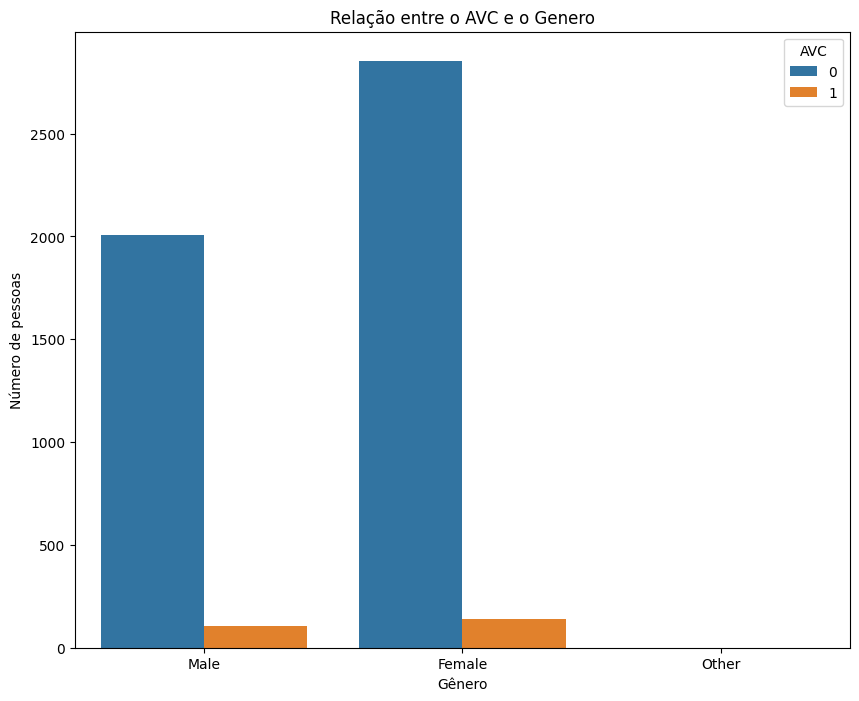

In [ ]:
#Relação entre o AVC e o Genero
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='genero', hue='AVC')
plt.title('Relação entre o AVC e o Genero')
plt.xlabel('Gênero')
plt.ylabel('Número de pessoas')

Análise: há mais mulheres que homens no ocnjunto de dados. Não há fortes indícios de que o AVC tenha relação com o gênero.

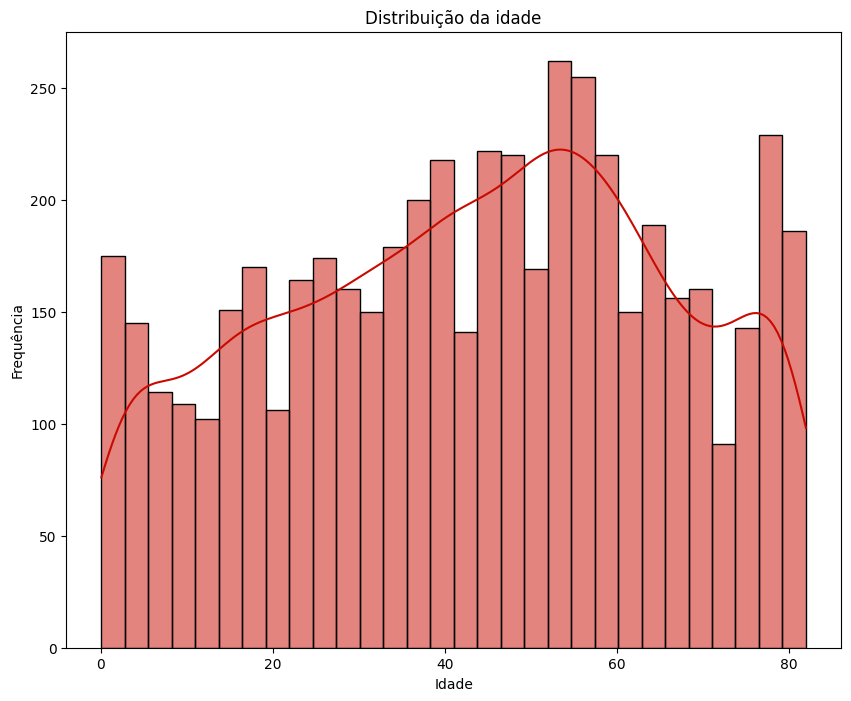

In [ ]:
#Visualizando a distribuição da idade
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='idade', kde=True, bins = 30, color='#c90a00')
sns.kdeplot(data=df, x='idade', color='#000000', linewidth = 2)
plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Análise: observando o histograma, percebe-se que há mais registros de pessoas entre 50 a e 60.

....

/tmp/ipython-input-3375798287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AVC', data=df, palette='Reds')


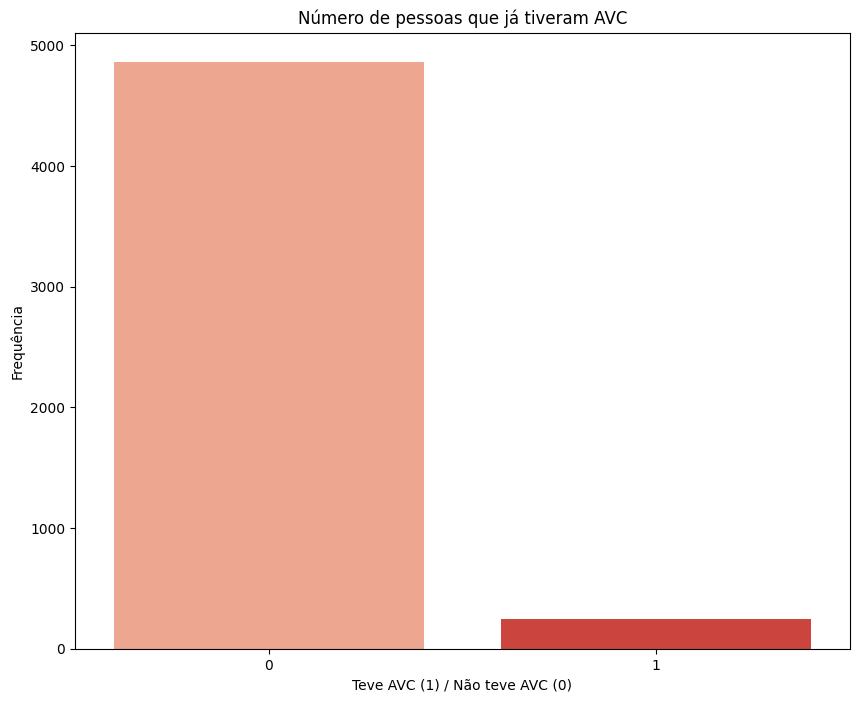

In [ ]:
#Contagem (AVC)
plt.figure(figsize=(10, 8))
sns.countplot(x='AVC', data=df, palette='Reds')
plt.title('Número de pessoas que já tiveram AVC')
plt.xlabel('Teve AVC (1) / Não teve AVC (0)')
plt.ylabel('Frequência')
plt.show()

Análise: Percebe-se que há muito mais pessoas que nunca tiveram AVC do que as que já teve AVC.

/tmp/ipython-input-3345384216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVC', y='idade', data=df, palette='Reds')


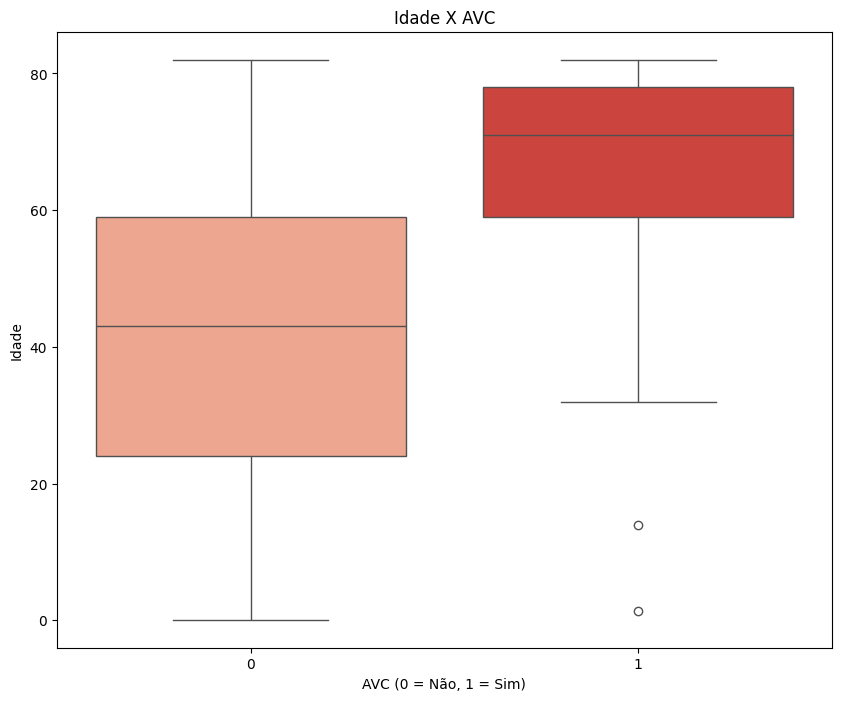

In [ ]:
#Idade X AVC
plt.figure(figsize=(10, 8))
sns.boxplot(x='AVC', y='idade', data=df, palette='Reds')
plt.title('Idade X AVC')
plt.xlabel('AVC (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

Análise: Nota-se uma associação entre a idade e o AVC, pois as pessoas que sofreram um Acidente Vascular Cerebral tendem a ser mais velhas.
Pessoas sem AVC tem idades entre 0 e 80 anos, com mediana um pouco acima de 40 anos. Já os pacientes com AVC são mais velhos, e tem a mediana próxima dos 70 anos.
Existem dois outliers, casos de pacientes com AVC entre 0 e pouco menos que 20 anos.

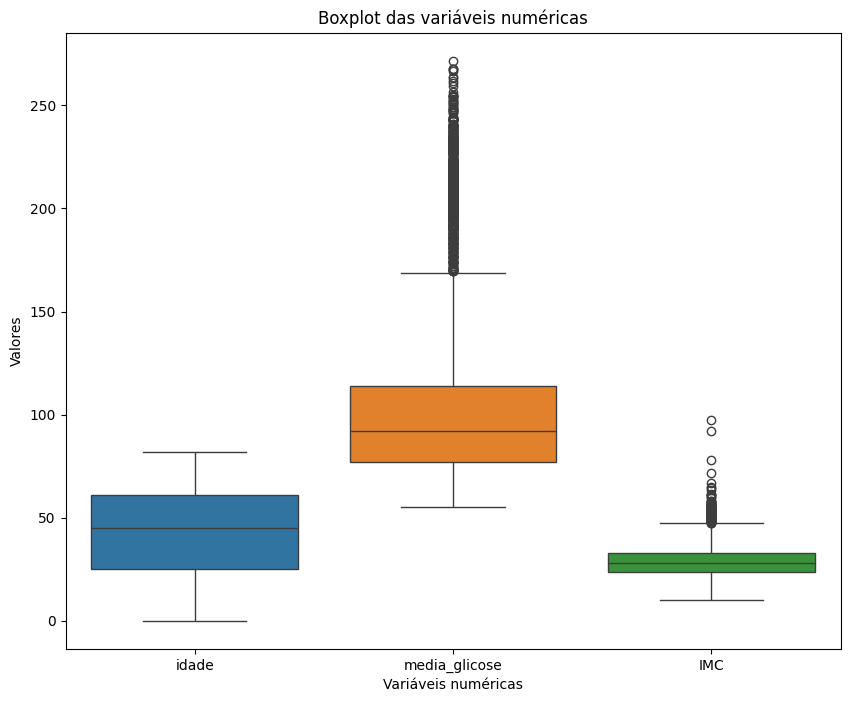

In [ ]:
#boxplot das variáveis numéricas (idade, media_glicose e IMC)
plt.figure(figsize=(10, 8))
sns.boxplot(data= df_float)
plt.title('Boxplot das variáveis numéricas')
plt.xlabel('Variáveis numéricas')
plt.ylabel('Valores')
plt.show()

Análise: Há pessoas muitos pacientes com o nível de glicose  e o IMC muito elevado (outliers).
A variação da glise vai de 50 a 170, aproximadamente, mas existem muitos pacientes com a glicose acima de 150.
Os casos de IMC acima 40 apontados no boxplot, podem ser considerados casos de obesidade grave.


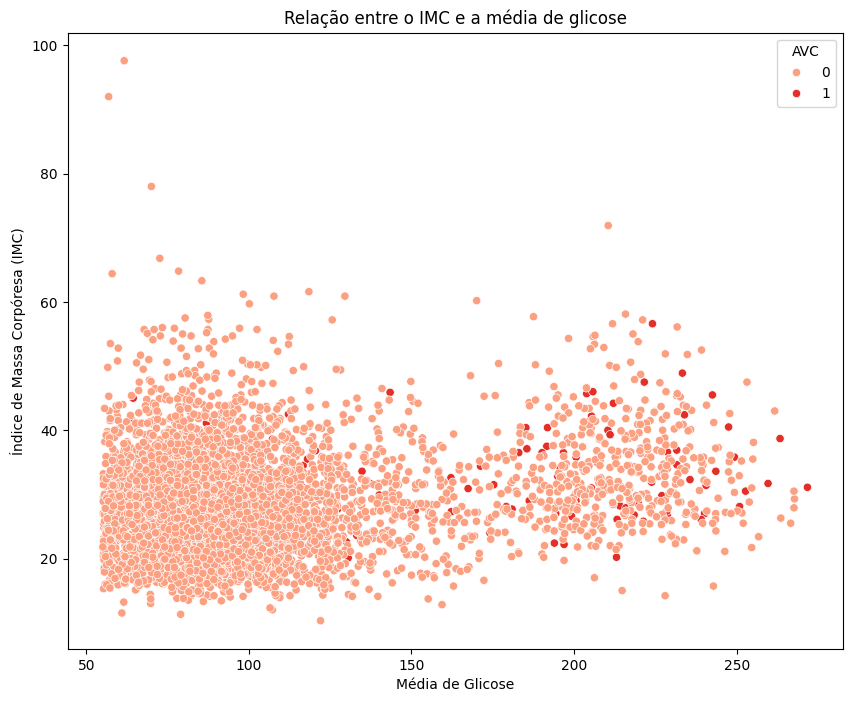

In [ ]:
#Relação entre o IMC e a média de glicose
plt.figure(figsize=(10, 8))
sns.scatterplot(x='media_glicose', y='IMC', data=df, hue='AVC', palette='Reds')
plt.title('Relação entre o IMC e a média de glicose')
plt.xlabel('Média de Glicose')
plt.ylabel('Índice de Massa Corpóresa (IMC)')
plt.show()

Análise: Os pontos vermelho escuro indicam os pacientes que teveram AVC, e os pontos vermelhos claro, indicam os que não tiveram.
A maioria destes pacientes estão com a glicose entre 50 e 150 e possuem o IMC entre 20 e 40. Estes valores não são muito elevados.
Isso mostra que não uma correlação forte entre o IMC e o nível de glicose.

/tmp/ipython-input-3951127869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AVC', y='media_glicose', data=df, palette='magma')


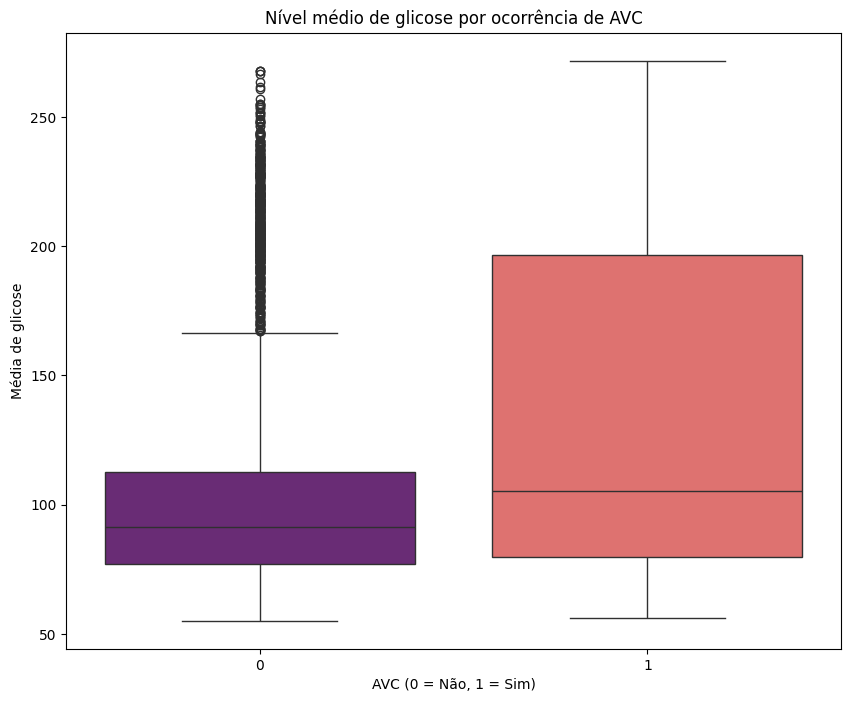

In [ ]:
#Glicose X AVC
plt.figure(figsize=(10, 8))
sns.boxplot(x='AVC', y='media_glicose', data=df, palette='magma')
plt.title('Nível médio de glicose por ocorrência de AVC')
plt.xlabel('AVC (0 = Não, 1 = Sim)')
plt.ylabel('Média de glicose')
plt.show()

Análise: os pacientes com AVC têm a glicose mais alta.

/tmp/ipython-input-2743822814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_trabalho', data=df, order=df['tipo_trabalho'].value_counts().index, palette='magma')


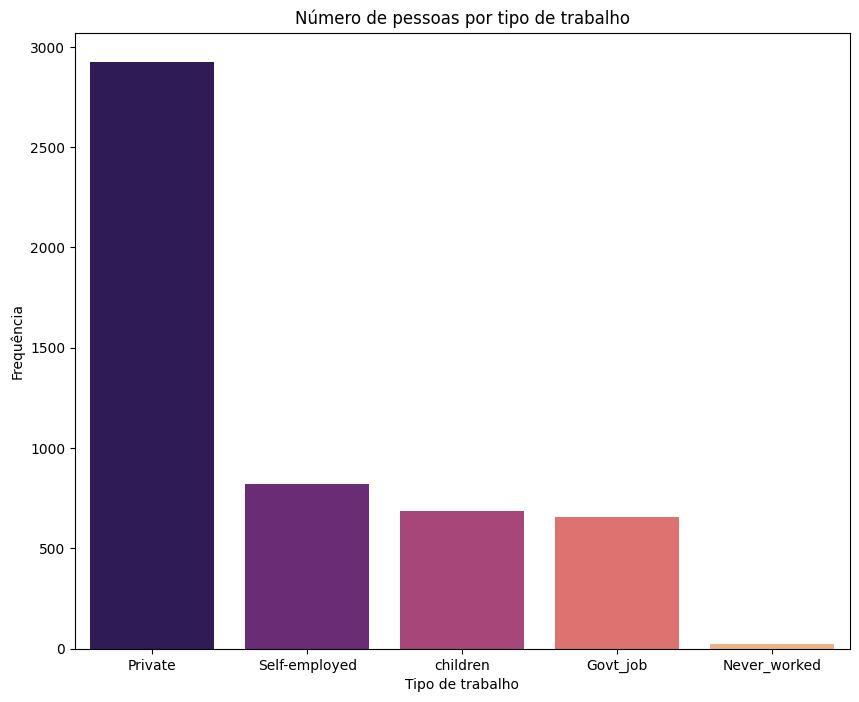

In [ ]:
#Contagem de pessoas por tipo de trabalho
plt.figure(figsize=(10, 8))
sns.countplot(x='tipo_trabalho', data=df, order=df['tipo_trabalho'].value_counts().index, palette='magma')
plt.title('Número de pessoas por tipo de trabalho')
plt.xlabel('Tipo de trabalho')
plt.ylabel('Frequência')
plt.show()

Análise: a maior parte dos pacientes são trabalhadores do setor privado.

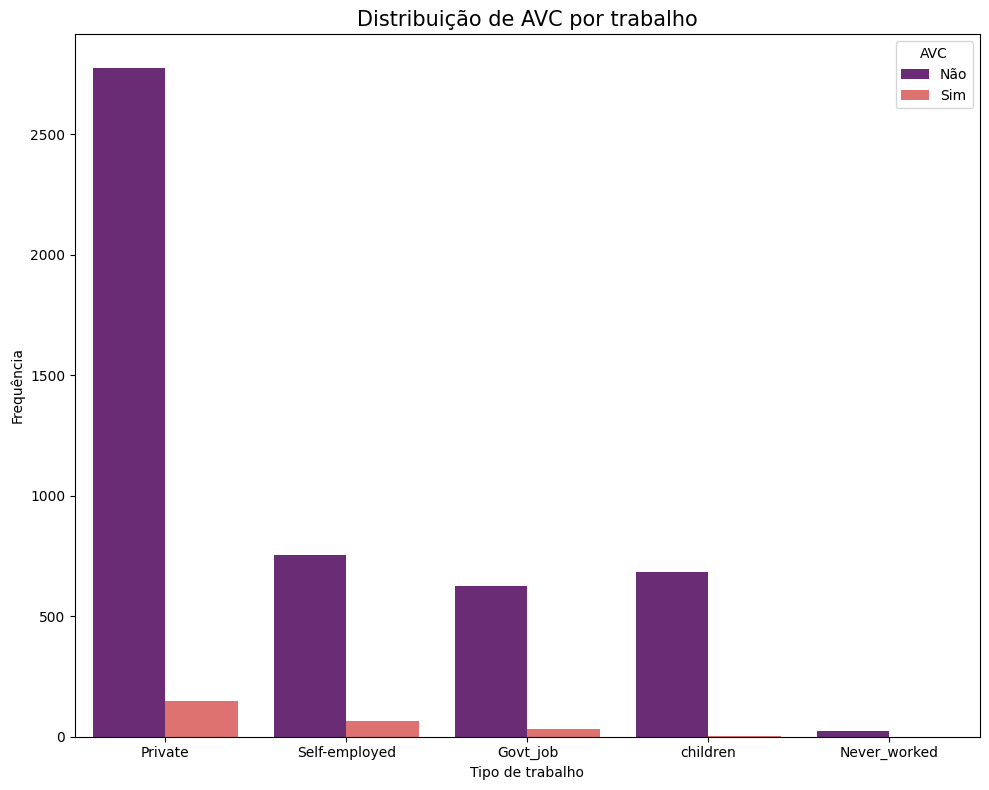

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='tipo_trabalho', hue='AVC', palette='magma')
plt.title('Distribuição de AVC por trabalho', fontsize = 15)
plt.xlabel('Tipo de trabalho')
plt.ylabel('Frequência')
plt.legend(title='AVC', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()


Análise: aparentemente, não há nenhuma relação dos casos de AVC com o setor de trabalho.

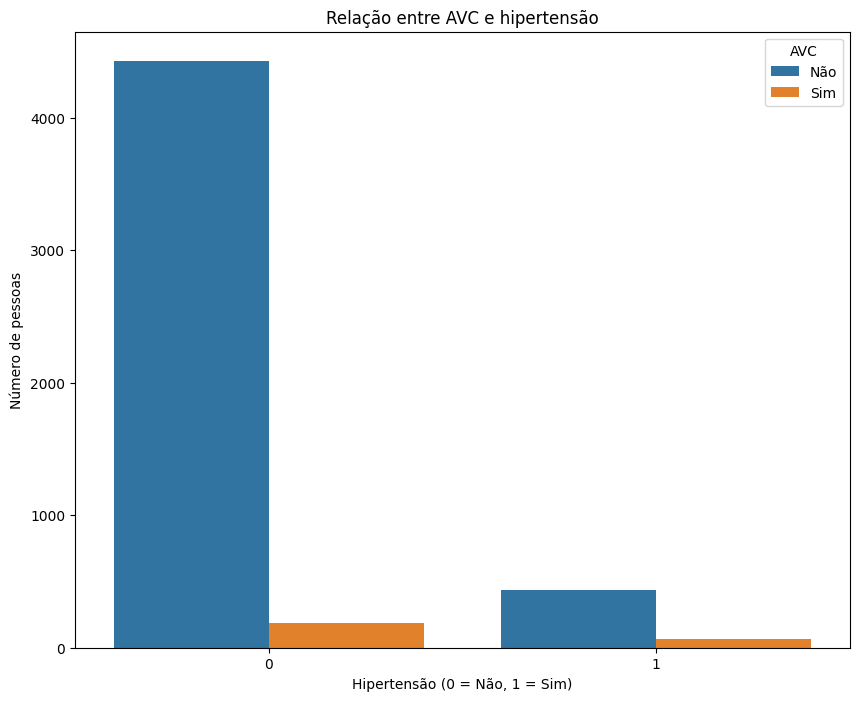

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='hipertensao', hue='AVC')
plt.title('Relação entre AVC e hipertensão')
plt.xlabel('Hipertensão (0 = Não, 1 = Sim)')
plt.ylabel('Número de pessoas')
plt.legend(title='AVC', labels=['Não', 'Sim'])
plt.show()

Análise: há mais pacientes sem hipertensão e dos que têm, poucos tiveram AVC.

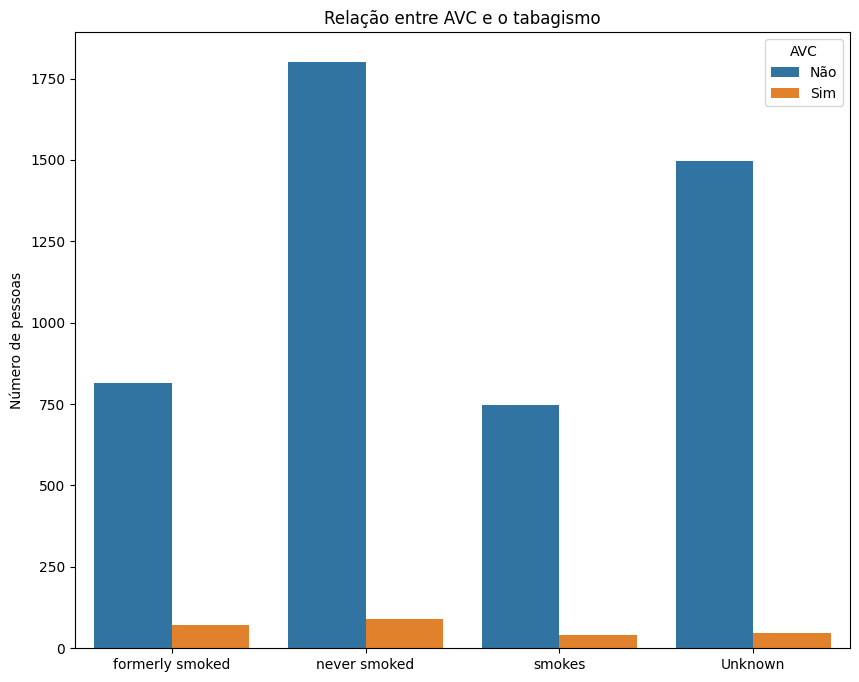

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='status_fumante', hue='AVC')
plt.title('Relação entre AVC e o tabagismo')
plt.xlabel('')
plt.ylabel('Número de pessoas')
plt.legend(title='AVC', labels=['Não', 'Sim'])
plt.show()

Análise: o número de pessoas com AVC e fumante foi um dos menores.

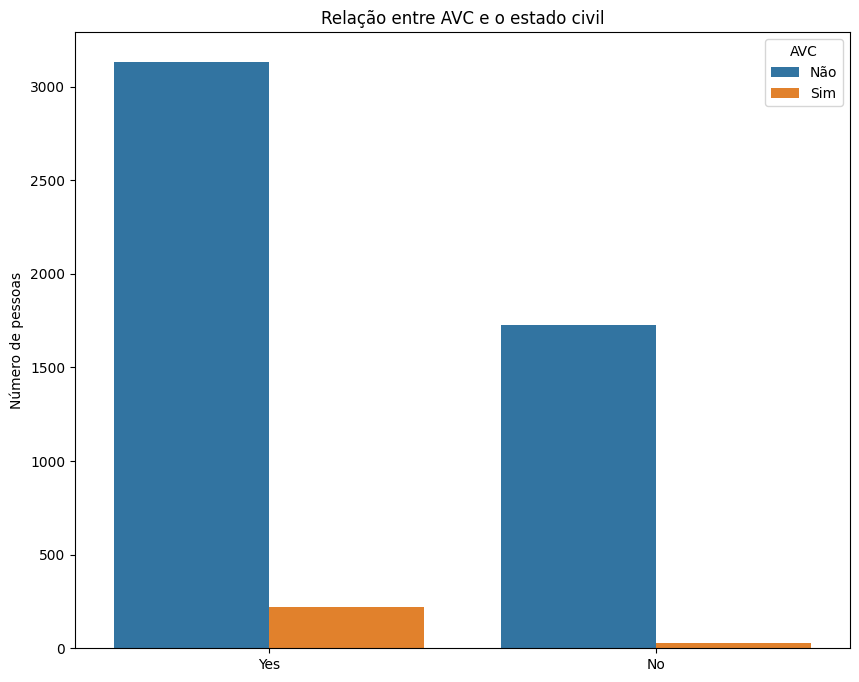

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='casado', hue='AVC')
plt.title('Relação entre AVC e o estado civil')
plt.xlabel('')
plt.ylabel('Número de pessoas')
plt.legend(title='AVC', labels=['Não', 'Sim'])
plt.show()

Análise: Entre os pacientes que tiveram AVC, a maioria é casado

#**Insights e hipóteses**

*   A probabilidade da ocorrência de um Acidente Vascular Cerebral aumenta conforme a idade se avança
*  Alguns casos de AVC acontecem em pacientes com glicose acima de 150, ou seja, há fortes indícios de que o nível de glicose elevado, está relacionado aos casos de AVC
*  Os casos de AVC indicam estar ligados a fatores internos, como a idade e a glicose. O tipo de trabalho, por exemplo, não é um fator determinante para se ter um AVC
* O dataset está desbalanceado, a  maioria dos registros são de pessoas que não tiveram AVC, o que dificulta as análises e não aponta padrões explícitos.

#**Riscos e Limitações**

O dataset pode conter viés, e não ter detalhes importantes sobre o histórico do paciente.

#**Pré-Processamento**

##**Limpeza de Dados**

###**Coluna IMC - Valores vazios**

a coluna imc possui 201 valores vazios. irei identificar as linhas e assim poder decidi se as retirarei ou imputarei.

Critérios

- Quantidade
- Relação com o AVC

In [ ]:
#verificando as linhas que possui o imc com valores vazios
vazios = df[df['IMC'].isnull()]
vazios

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
#quantidade de pessoas qe possuem avc
vazios['AVC'].value_counts()

,count
AVC,
0,161
1,40


In [ ]:
#verificando qual a fração que essas linhas vazias são em relação a base total
df['IMC'].isna().mean()


np.float64(0.03933463796477495)

- os valores vazios representam ~ 4% da base total

In [ ]:
#verificando se tem relação entre os valores vazios com o avc
df.groupby('AVC')['IMC'].apply(lambda x: x.isna().mean())

,IMC
AVC,
0,0.033121
1,0.160643


- entre as pessoas que tiveram avc 3% tem valores ausentes
- entre os que não tiveram 16% possuem valores ausentes

In [ ]:
df['IMC'].describe()

,IMC
count,4909.000000
mean,28.893237
std,7.854067
min,10.300000
25%,23.500000
50%,28.100000
75%,33.100000
max,97.600000


In [ ]:
#verificando a média do imc por classe de avc
df.groupby('AVC')['IMC'].describe()

,count,mean,std,min,25%,50%,75%,max
AVC,,,,,,,,
0,4700.0,28.823064,7.908287,10.3,23.4,28.0,33.1,97.6
1,209.0,30.471292,6.329452,16.9,26.4,29.7,33.7,56.6


In [ ]:
df.groupby('AVC')['IMC'].median()

,IMC
AVC,
0,28.0
1,29.7


- Para a classe 0 a media e mediana são iguais
- para a classe 1 a media > mediana

In [ ]:
df['IMC'].median()

28.1

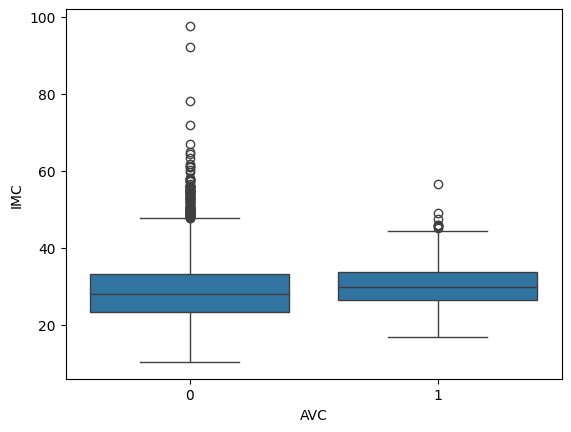

In [ ]:
#distribuição do imc por ocorrencia de avc
sns.boxplot(x='AVC', y='IMC', data=df)
plt.show()

Conclusão:  

-  A proporção de valores vazios para a classe dos que tiveram avc é bem maior do que os que não tiveram e considerando que a classe 1 já possui poucas amostras, optaremos por imputar em vez de excluir as linhas com valores vazios.

###**Imputação -  coluna IMC**

- imputação por grupo, pois cada classe possui uma distribuição diferente
- imputação via mediana, pois as classes possuem outliers e se fosse utilizado a média, ela poderia ser puxada pra cima ou pra baixo por conta dos outliers

In [ ]:
#realizando imputação com mediana
df['IMC'].fillna(df.groupby('AVC')['IMC'].transform('median'), inplace=True)

/tmp/ipython-input-2085036147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IMC'].fillna(df.groupby('AVC')['IMC'].transform('median'), inplace=True)


In [ ]:
#verificando dados ausentes
df.isnull().sum()

,0
id,0
genero,0
idade,0
hipertensao,0
doenca_cardiaca,0
casado,0
tipo_trabalho,0
tipo_residencia,0
media_glicose,0
IMC,0


- valores vazios foram preenchido pela mediana

In [ ]:
#verificando a média do imc por classe de avc
df.groupby('AVC')['IMC'].describe()

,count,mean,std,min,25%,50%,75%,max
AVC,,,,,,,,
0,4861.0,28.795803,7.777588,10.3,23.6,28.0,32.8,97.6
1,249.0,30.347390,5.803524,16.9,27.0,29.7,32.5,56.6


In [ ]:
df.groupby('AVC')['IMC'].median()

,IMC
AVC,
0,28.0
1,29.7


In [ ]:
df['IMC'].median()

28.0

In [ ]:
df['IMC'].describe()

,IMC
count,5110.000000
mean,28.871409
std,7.699951
min,10.300000
25%,23.800000
50%,28.000000
75%,32.800000
max,97.600000


####**Comparação da média por classe da coluna IMC antes e depois da imputação**

| Classe |   x̄   |  x̄1 | mediana
|:-----  |:------|:----| :----
|   0    |28.82  |28.79| 28.0
|   1    |30.47  |30.34| 29.7


####**Comparação da média da coluna IMC antes e depois da imputação**

|   x̄   |  x̄1 | mediana|
|:------|:----| :----  |
|28.89  |28.87|  28


- a média diminuiu um pouco.

##**Outliers**

- Como analisado anteriormente, foi detectado outliers nas variáveis IMC e glicose. Porém, esses outliers podem significar que a pessoa tem obesidade, ou diabetes. Sendo assim, optamos por não remover esses outliers devido o contexto da variável


-  No boxplot feito com a coluna AVC e idade, apontou que existem 2 outliers. Crianças abaixos de 20 anos que tiveram avc.

- O EDA apontou que na coluna 'idade', possuem valores tipo float.

In [ ]:
#filtrando valores floats
filtro =  (df['idade'] % 1 != 0)

linhas_filtradas = df[filtro]

linhas_filtradas

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC
162,69768,Female,1.32,0,0,No,children,Urban,70.37,29.7,Unknown,1
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,28.0,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


In [ ]:
linhas_filtradas['AVC'].value_counts()

,count
AVC,
0,114
1,1


- 114 linhas que possuem idades erradas são de pessoas que não tiveram AVC e 1 de quem teve.

In [ ]:
df['idade'].mean()

np.float64(43.226614481409)

In [ ]:
df['idade'].median()

45.0

- media < mediana
- valores baixos influenciou para que a média estivesse abaixo da mediana.

Observações
- Como as idades erradas estão associadas a registros de crianças, não seria ideal substituí-las pela média ou mediana, já que criaria idades artificiais.

Decisão:
- Visto que, das 115 linhas que possuem esses valores errados, apenas uma corresponde que teve AVC, excluí-las não agravará o desbalanceamento dos dados.

###**Exclusão de linhas - Idade**

In [ ]:
#retirada de linhas com valores inconsistentes
df = df[df['idade'] % 1 == 0]

In [ ]:
df['AVC'].value_counts()

,count
AVC,
0,4747
1,248


In [ ]:
df['idade'].describe()

,idade
count,4995.000000
mean,44.195796
std,21.939766
min,1.000000
25%,27.000000
50%,45.000000
75%,61.000000
max,82.000000


In [ ]:
df['idade'].mean()

np.float64(44.195795795795796)

In [ ]:
df['idade'].median()

45.0

In [ ]:
#filtrando valores floats
linhas_erradas = df[df['idade'] % 1 != 0]
linhas_erradas

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC


####**Comparação do volume da base de dados antes e depois da exclusão das linhas inconsistentes**

|  classe  |  count1 | count2 |
|:------   |:----    |:----   |
| 0        |  4861   |   4747 |
| 1        |   249   |   248  |
|Total     |5110     |4995   |


####**Comparação da idade mínima antes e depois da exclusão das linhas inconsistentes**

|  min1  | min2 |
|:------   |:----    |
| 0.08     |  1   |  



####**Comparação da média da coluna idade antes e depois da exclusão**

|   x̄   |  x̄1 | mediana|
|:------|:----|:----   |
|43.22  |44.19|    45  |

- a média aumentou após a retirada dos valores inconsistentes, se aproximando da mediana.

No artigo:

- Work Type: Cada valor foi transformado em uma coluna. Quando um paciente apresenta determinado valor a respectiva coluna é preenchida com 1 e as outras com 0. Como são 5 valores, a base tem 5 colunas a mais e a coluna original work type é excluída.

- Other da coluna gênero: analisar se irá ser eliminada

In [ ]:
df

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante,AVC
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


- O other pertence a classe 0 (não AVC) e pode ser retirada do df

In [ ]:
#retirando linha other
df = df[(df['genero'] == 'Female') | (df['genero'] == 'Male')]

In [ ]:
#verificando valores da coluna genero
df['genero'].value_counts()

,count
genero,
Female,2938
Male,2056


**Com a eliminação da linha other:**

|  classe  |  count1 | count2 | count3
|:------   |:----    |:----   |:------|
| 0        |  4861   |   4747 | 4746
| 1        |   249   |   248  | 248
|Total     |5110     |4995    | 4994

Então foi realizado a remoção do other. Em vez de transformar as variáveis em coluna, tem a opção de transformar as categóricas em numéricas via 'pd.get_dummies(drop_first=True);'

##**Separando Variáveis independentes da dependente**

In [ ]:
#df das variáveis independentes X
X = df.drop(['id', 'AVC'], axis=1)

In [ ]:
X

,genero,idade,hipertensao,doenca_cardiaca,casado,tipo_trabalho,tipo_residencia,media_glicose,IMC,status_fumante
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.7,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.0,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


##**Codificação de variáveis categóricas**

In [ ]:
X = pd.get_dummies(X, drop_first=True).astype(int)
X

,idade,hipertensao,doenca_cardiaca,media_glicose,IMC,genero_Male,casado_Yes,tipo_trabalho_Never_worked,tipo_trabalho_Private,tipo_trabalho_Self-employed,tipo_trabalho_children,tipo_residencia_Urban,status_fumante_formerly smoked,status_fumante_never smoked,status_fumante_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,1,0,0
1,61,0,0,202,29,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,1,0,83,28,0,1,0,1,0,0,1,0,1,0
5106,81,0,0,125,40,0,1,0,0,1,0,1,0,1,0
5107,35,0,0,82,30,0,1,0,0,1,0,0,0,1,0
5108,51,0,0,166,25,1,1,0,1,0,0,0,1,0,0


In [ ]:
le = LabelEncoder()
df['AVC'] = le.fit_transform(df['AVC'])
y = df['AVC']

/tmp/ipython-input-1642593842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AVC'] = le.fit_transform(df['AVC'])


In [ ]:
y

,AVC
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


#**Aplicação dos algoritmos com Dados Desbalanceados**

####**Dados desbalanceados**

|  classe  | Quant.
|:------   |:------|
| 0        | 4746
| 1        |  248
|Total     | 4994

##**Regressão Logística**

- Recall (Sensibilidade): Entre todos os positivos reais, quantos o modelo encontrou? Importante em contextos críticos (saúde, fraude).

- Precisão (Precision): Entre tudo que o modelo disse ser positivo, quantos realmente são? Importante para evitar falsos positivos.



In [ ]:
#separando em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        stratify = y,     #mantem o desbalanceamento
                                                        random_state=42)

In [ ]:
modelo_reg = LogisticRegression(penalty ='l2',              #parametro de regularização
                                class_weight = 'balanced',  #define os pesos para as classe de forma balanceada
                                solver = 'lbfgs',            #otimização da regressão
                                max_iter = 1000,             #quantidade maxima de interações
                                random_state = 42)          #semente

In [ ]:
parametros_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}   #parametro para penalização

In [ ]:
grid = GridSearchCV(modelo_reg,
                    param_grid = parametros_grid,
                    cv = 5,
                    scoring = 'recall')

In [ ]:
grid.fit(X_treino, y_treino)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='recall')

In [ ]:
print('Melhores parâmetros:', grid.best_params_)
print('Melhor score (recall):', grid.best_score_)

Melhores parâmetros: {'C': 1}
Melhor score (recall): 0.8336134453781513


In [ ]:
#aplicar o modelo no conjunto de teste com os parametros escolhidos pelo cross + grid
modelo_reg = grid.best_estimator_
y_pred = modelo_reg.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print('Acurácia:', accuracy_score(y_teste, y_pred))
print('Precision_neg:', precision_score(y_teste, y_pred, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred))

Acurácia: 0.733822548365577
Precision_neg: 0.9812382739212008
Precision_pos: 0.12471131639722864
F1_neg: 0.8398233641107988
F1_pos: 0.21301775147928995
Recall_neg: 0.7340350877192983
Recall_pos: 0.7297297297297297
AUC: 0.731882408724514


##**Random Forest**


In [ ]:
#Tratando ausentes
df["IMC"] = df["IMC"].fillna(df["IMC"].mean())

/tmp/ipython-input-2857242737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IMC"] = df["IMC"].fillna(df["IMC"].mean())


In [ ]:
#Removendo coluna ID
df = df.drop(columns=["id"])

In [ ]:
#One-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Separando X e y

X = df.drop(columns=["AVC"])
y = df["AVC"]

In [ ]:
#Sepando em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=42,
                                                        stratify = y)

In [ ]:
#Treinando o Random Forest

rf = RandomForestClassifier(
    random_state=42,
    n_estimators = 1000,
    max_depth=None,
    class_weight="balanced")

rf.fit(X_treino, y_treino)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       random_state=42)

In [ ]:
#Grid com hiperparâmetros
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
#Grid com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid = param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose = 1)

In [ ]:
#treinando grid
grid_search.fit(X_treino, y_treino)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_estimators=1000,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500, 1000]},
             scoring='f1', verbose=1)

In [ ]:
#Melhores hiperparâmetros
print("Melhores parâmetros:")
print(grid_search.best_params_)

Melhores parâmetros:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#treinando modelo finalizado
best_rf = grid_search.best_estimator_

In [ ]:
#Previsão

y_pred_rf = best_rf.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print('Acurácia:', accuracy_score(y_teste, y_pred_rf))
print('Precision_neg:', precision_score(y_teste, y_pred_rf, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rf, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rf, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rf, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rf, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rf, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rf))


Acurácia: 0.8879252835223482
Precision_neg: 0.9617927994121969
Precision_pos: 0.15942028985507245
F1_neg: 0.9396984924623115
F1_pos: 0.20754716981132076
Recall_neg: 0.9185964912280702
Recall_pos: 0.2972972972972973
AUC: 0.6079468942626838


#**Aplicação de técnicas de Balanceamento dos Dados**

##**Oversampling com SMOTE**

In [ ]:
#treino e teste antes do SMOTE
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [ ]:
#SMOTE somente no treino
smote = SMOTE(random_state=42)
X_treino_res, y_treino_res = smote.fit_resample(X_treino, y_treino)

In [ ]:
print("\nDistribuição de classes após o SMOTE:")
print(y_treino_res.value_counts())


Distribuição de classes após o SMOTE:
AVC
0    3321
1    3321
Name: count, dtype: int64


##**Undersampling com ENN**

In [ ]:
#Aplicando treino e teste antes do ENN
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.3,
                                                        stratify = y,
                                                        random_state=42)

In [ ]:
#ENN apenas no treino
enn = EditedNearestNeighbours(sampling_strategy = 'majority', n_neighbors = 13)
X_treino_enn, y_treino_enn = enn.fit_resample(X_treino, y_treino)

In [ ]:
print("\nDistribuição dos dados após o Undersampling:")
print(y_treino_enn.value_counts())


Distribuição dos dados após o Undersampling:
AVC
0    2275
1     174
Name: count, dtype: int64


##**SMOTTENN**

In [ ]:
# Aplicar SMOTEENN para balancear o dataset
smote_enn = SMOTEENN(random_state=42)
X_enn, y_enn = smote_enn.fit_resample(X, y)

#Treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_enn,
                                                        y_enn,
                                                        test_size = 0.2,
                                                        random_state = 42,
                                                        stratify = y_enn)

In [ ]:
print("\nDistribuição de classes após o SMOTEENN:")
print(y_enn.value_counts())


Distribuição de classes após o SMOTEENN:
AVC
1    4401
0    3553
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

**Dados Balanceados**

|  CLASSE  | desb | SMOTE |  ENN  | SMOTEENN
|:------   |:------|:------|:------|:--------|
| 0        | 4746 |3321  |2275   | 4401    |
| 1        |  248 | 3321 | 175  | 3553    |
|Total     | 4994 |6642  | 2450  | 7954    |

#**Aplicação dos Algoritmos com Dados Balanceados**

##**Regressão Logística - Com Dados Balanceados com SMOTE**

In [ ]:
modelo_reg = LogisticRegression(penalty ='l2',
                                class_weight = 'balanced',
                                solver = 'lbfgs',
                                max_iter = 1000,
                                random_state = 42)

In [ ]:
parametros_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid = GridSearchCV(modelo_reg,
                    param_grid = parametros_grid,
                    cv = 5,
                    scoring = 'recall')

In [ ]:
grid.fit(X_treino_res, y_treino_res)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='recall')

In [ ]:
print('Melhores parâmetros:', grid.best_params_)
print('Melhor score (recall):', grid.best_score_)

Melhores parâmetros: {'C': 1}
Melhor score (recall): 0.8659996376483378


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Regressão Logística com SMOTE")
print("---------------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred))
print('Precision_neg:', precision_score(y_teste, y_pred, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred))

Métricas: Regressão Logística com SMOTE
---------------------------------------
Acurácia: 0.8265510340226818
Precision_neg: 0.9656274980015987
Precision_pos: 0.125
F1_neg: 0.9028400597907325
F1_pos: 0.19254658385093168
Recall_neg: 0.847719298245614
Recall_pos: 0.4189189189189189
AUC: 0.6333191085822665


##**Random Forest - Com Dados Balanceados com SMOTE**

In [ ]:
#Tratando ausentes
df["IMC"] = df["IMC"].fillna(df["IMC"].mean())

/tmp/ipython-input-2857242737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IMC"] = df["IMC"].fillna(df["IMC"].mean())


In [ ]:
#Removendo Coluna ID
df = df.drop(columns=["id"])

In [ ]:
#One-hot
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Separando X e y
X = df.drop(columns=["AVC"])
y = df["AVC"]

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight = None)

In [ ]:
#Grid com hiperparâmetros
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
#Grid com validação cruzada
grid_search = GridSearchCV(estimator=rf,
                           param_grid = param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose = 1)

In [ ]:
#treinando grid
grid_search.fit(X_treino_res, y_treino_res)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Melhores parâmetros RF:", grid.best_params_)
print("Melhor Recall (CV):", grid.best_score_)

In [ ]:
#Treinando modelo final
best_rf = grid_search.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Random Forest com SMOTE")
print("---------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred_rf))
print('Precision_neg:', precision_score(y_teste, y_pred_rf, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rf, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rf, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rf, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rf, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rf, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rf))

##**Regressão Logística - Com Dados Balanceados com  ENN**

In [ ]:
modelo_reg = LogisticRegression(penalty ='l2',
                                class_weight = 'balanced',
                                solver = 'lbfgs',
                                max_iter = 1000,
                                random_state = 42)

In [ ]:
parametros_grid_rl = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_rl= GridSearchCV(modelo_reg,
                    param_grid = parametros_grid_rl,
                    cv = 5,
                    scoring = 'recall')

In [ ]:
grid_rl.fit(X_treino_enn, y_treino_enn)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='recall')

In [ ]:
print('Melhores parâmetros:', grid_rl.best_params_)
print('Melhor score (recall):', grid_rl.best_score_)

Melhores parâmetros: {'C': 0.001}
Melhor score (recall): 0.878655462184874


In [ ]:
best_rl = grid_rl.best_estimator_
y_pred_rl = best_rl.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Regressão Logística com ENN")
print("-------------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred_rl))
print('Precision_neg:', precision_score(y_teste, y_pred_rl, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rl, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rl, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rl, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rl, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rl, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rl))

Métricas: Regressão Logística com ENN
-------------------------------------
Acurácia: 0.6577718478985991
Precision_neg: 0.9861407249466951
Precision_pos: 0.10873440285204991
F1_neg: 0.7829030892932712
F1_pos: 0.1921259842519685
Recall_neg: 0.6491228070175439
Recall_pos: 0.8243243243243243
AUC: 0.7367235656709341


##**Random Forest - Com Dados Balanceados com  ENN**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Tratando ausentes
df["IMC"] = df["IMC"].fillna(df["IMC"].mean())

/tmp/ipython-input-2857242737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IMC"] = df["IMC"].fillna(df["IMC"].mean())


In [ ]:
#Removendo Coluna ID
df = df.drop(columns=["id"])

In [ ]:
#One-hot
df = pd.get_dummies(df, drop_first=True)

In [ ]:
#Separando X e y
X = df.drop(columns=["AVC"])
y = df["AVC"]

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight = 'balanced')

In [ ]:
#Grid com hiperparâmetros
param_grid_rf = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(rf, param_grid_rf,
                       cv=5, scoring='recall')

In [ ]:
#Treinando com ENN
grid_rf.fit(X_treino_enn, y_treino_enn)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [None, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='recall')

In [ ]:
print('Melhores parâmetros:', grid_rf.best_params_)
print('Melhor score (recall):', grid_rf.best_score_)

Melhores parâmetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Melhor score (recall): 0.717983193277311


In [ ]:
#Treinando modelo final
best_rf = grid_rf.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Random Forest com ENN")
print("---------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred_rf))
print('Precision_neg:', precision_score(y_teste, y_pred_rf, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rf, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rf, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rf, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rf, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rf, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rf))

Métricas: Random Forest com ENN
---------------------------------
Acurácia: 0.7891927951967979
Precision_neg: 0.9751499571550986
Precision_pos: 0.1355421686746988
F1_neg: 0.8780864197530864
F1_pos: 0.22167487684729065
Recall_neg: 0.7985964912280702
Recall_pos: 0.6081081081081081
AUC: 0.7033522996680892


##**Regressão Logística - Com Dados Balanceados com SMOTENN**

In [ ]:
rl = LogisticRegression(max_iter = 1000)

parametros_grid_rl = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                      'solver': ['liblinear', 'lbbfgs']}

In [ ]:
#Grid
grid_rl = GridSearchCV(rl,
                       parametros_grid_rl, cv = 5,
                       scoring = 'recall')
grid_rl.fit(X_treino, y_treino)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbbfgs']},
             scoring='recall')

In [ ]:
best_rl = grid_rl.best_estimator_
y_pred_rl = best_rl.predict(X_teste)

In [ ]:
print("Melhores parâmetros RF:", grid_rl.best_params_)
print("Melhor Recall (CV):", grid_rl.best_score_)

Melhores parâmetros RF: {'C': 0.001, 'solver': 'liblinear'}
Melhor Recall (CV): 0.9298480818826563


In [ ]:
#Treinando modelo final
best_rl = grid_rl.best_estimator_

In [ ]:
y_pred_rl = best_rl.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Regressão Logística com SMOTENN")
print("---------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred_rl))
print('Precision_neg:', precision_score(y_teste, y_pred_rl, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rl, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rl, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rl, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rl, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rl, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rl))

Métricas: Regressão Logística com SMOTENN
---------------------------------
Acurácia: 0.8874921433060968
Precision_neg: 0.8982035928143712
Precision_pos: 0.8797399783315276
F1_neg: 0.8701957940536621
F1_pos: 0.9007210205213533
Recall_neg: 0.8438818565400844
Recall_pos: 0.9227272727272727
AUC: 0.8833045646336786


##**Random Forest - Com Dados Balanceados com SMOTENN**

In [ ]:
rf = RandomForestClassifier(random_state = 42)

parametros_grid_rf = {'n_estimators': [100, 200],
                      'max_depth': [None, 10, 20],
                      'min_samples_split': [2, 5],
                      'min_samples_leaf': [1, 2]}

In [ ]:
#Grid
grid_rf = GridSearchCV(rf,
                       parametros_grid_rf,
                       cv = 5,
                       scoring = 'recall')
grid_rf.fit(X_treino, y_treino)

In [ ]:
print("Melhores parâmetros RF:", grid_rf.best_params_)
print("Melhor Recall (CV):", grid_rf.best_score_)

In [ ]:
#Treinando modelo final
best_rf = grid_rf.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_teste)

In [ ]:
#avaliação por meio das métricas
print("Métricas: Random Forest com SMOTENN")
print("---------------------------------")
print('Acurácia:', accuracy_score(y_teste, y_pred_rf))
print('Precision_neg:', precision_score(y_teste, y_pred_rf, pos_label=0))
print('Precision_pos:', precision_score(y_teste, y_pred_rf, pos_label=1))
print('F1_neg:', f1_score(y_teste, y_pred_rf, pos_label=0))
print('F1_pos:', f1_score(y_teste, y_pred_rf, pos_label=1))
print('Recall_neg:', recall_score(y_teste, y_pred_rf, pos_label=0))
print('Recall_pos:', recall_score(y_teste, y_pred_rf, pos_label=1))
print('AUC:', roc_auc_score(y_teste, y_pred_rf))

#**Avaliação Final**

|Modelo|Balanceamento|Acurácia (%)|Precision_neg (%)|Precision_pos(%)|F1_neg (%)|F1_pos(%)|Recall_neg(%)|Recall_pos(%)|AUC (%)|
|--------|----------------|----------|----------------|----------------|---------|---------|-------------|--------------|------|
|Regressão Logística|Não|73,38|98,12|12,47|83,98|21,30|73,40|72,97|73,18|
|Random Forest|Não|88,79|96,17|15,94|93,96|20,75|91,85|29,72|60,79|
|Regressão Logística|SMOTE|82,65|96,56|12,5|90,28|19,25|84,77|41,89|63,33|
|Random Forest|SMOTE|90,66|95,59|13,33|95,05|14,63|94,52|16,21|55,37|
|Regressão Logística|ENN|65,77|98,61|10,87|78,29|19,21|64,91|82,43|73,67|
|Random Forest|ENN|78,91|97,51|13,55|87,80|22,16|79,85|60,81|70,33|
|Regressão Logística|SMOTENN|88,74|89,82|87,97|87,01|90,07|84,38|92,27|88,33|
|Random Forest|SMOTENN|96,35|96,97|95,87|95,87|96,73|94,79|97,61|96,20|

**Métricas a serem observadas**

- Recall: Entre todos os positivos reais, quantos o modelo encontrou? (ex: identifica pacientes doentes?)

- Precisão: Entre tudo que o modelo disse ser positivo, quantos realmente são? (ex: evita alarmar quem não está doente?)

- F1-Score: Média harmônica entre Precisão e Recall. (ex: balanço entre os dois?)

**Perguntas norteadoras**

Para a base de dados original, qual o modelo obteve a predição mais precisa? E para a base de dados desbalanceada?

- Para os dados não balanceados, a regressão logistica obteve a predição mais precisa.
- Para os dados balanceados, o random forest obteve a predição mais precisa.

Qual técnica de balanceamento de dados melhorou o desempenho dos algoritmos?

- A técnica SMOTTEEN melhorou o desempenho dos algortimos de forma significativa.